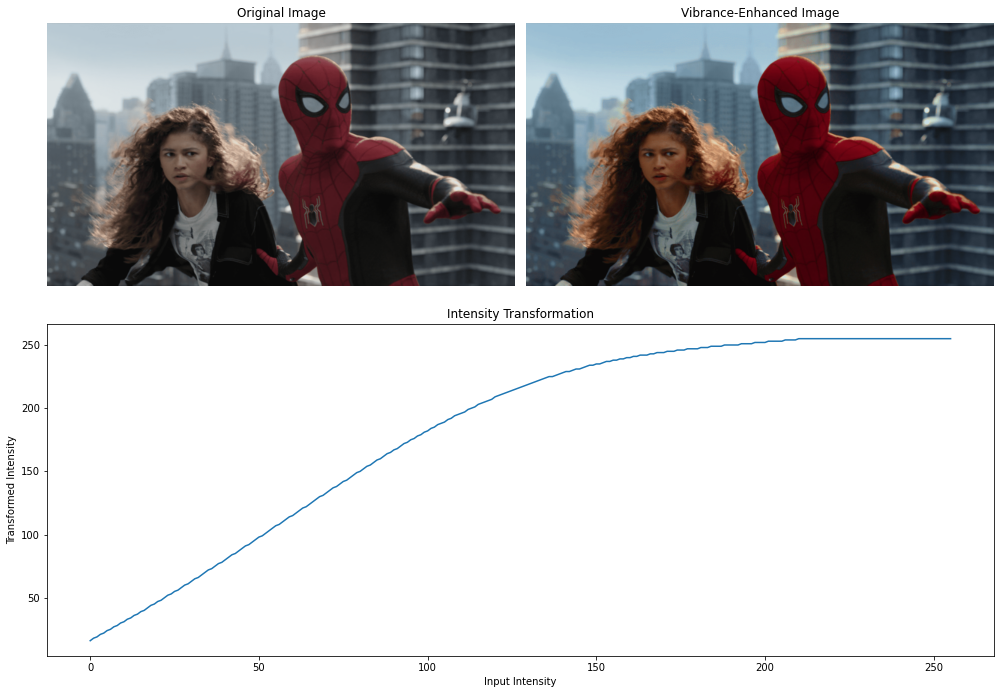

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


image_path = 'spider.png'
original_image = cv2.imread(image_path)
hsv_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2HSV)

#Split in to H, S, V planes 
hue_plane, saturation_plane, value_plane = cv2.split(hsv_image)

# Intensity transformation function
def intensity_transformation(x, a, sigma=70):
    return min(int(x + a * 128 * np.exp(-((x - 128)**2) / (2 * sigma**2))), 255)

# Apply the intensity transformation to the saturation plane
a = 0.7  
transformed_saturation_plane = np.vectorize(intensity_transformation)(saturation_plane, a, sigma=70)
# Recombine 
enhanced_hsv_image = cv2.merge((hue_plane, transformed_saturation_plane.astype(np.uint8), value_plane))
# Convert  back to BGR color space
enhanced_bgr_image = cv2.cvtColor(enhanced_hsv_image, cv2.COLOR_HSV2BGR)

# Display
plt.figure(figsize=(14, 10))

plt.subplot(221)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(222)
plt.title('Vibrance-Enhanced Image')
plt.imshow(cv2.cvtColor(enhanced_bgr_image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(212)
plt.title('Intensity Transformation')
x_vals = np.arange(0, 256)
y_vals = [intensity_transformation(x, a) for x in x_vals]
plt.plot(x_vals, y_vals)
plt.xlabel('Input Intensity')
plt.ylabel('Transformed Intensity')

plt.tight_layout()
plt.show()
